In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("fires_thefts.csv", names = ["x", "y"])
data.head()

,x,y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


In [2]:
print(data.shape)

(42, 2)


In [3]:
x = data["x"].to_numpy()
y = data["y"].to_numpy()

In [4]:
m, n = np.shape(data)

In [5]:
theta=np.zeros(n,float)

### Funkcja hipotezy

In [1]:
def h(theta, x):
    return theta[0] + theta[1]* x

### Funkcja kosztu

In [7]:
def J(h, theta, x, y):
    m = len(y)
    return (1/2*m) * sum((h(theta, x[i]) - y[i]) ** 2 for i in range(m))

### Gradient prosty

In [12]:
def gradient_descent(h, J, theta, x, y, alpha, eps):
    current_cost = J(h, theta, x, y)
    while True:
        new_theta = [theta[0] - alpha / m * sum(h(theta, x[i]) - y[i] for i in range(m)),
                     theta[1] - alpha / m * sum((h(theta, x[i]) - y[i]) * x[i] for i in range(m))]
        theta = new_theta
        try:
            prev_cost = current_cost
            current_cost = J(h, theta, x, y)
        except OverflowError:
            break
        if abs(prev_cost - current_cost) <= eps:
            break
    return theta, current_cost

In [13]:
best_theta, current_cost = gradient_descent(h, J, theta, x, y, alpha=0.001, eps=0.0001)

print(np.matrix(best_theta).reshape(2, 1))
print(current_cost)

[[16.97431629]
 [ 1.31450579]]
318243.5164677369


In [64]:
print(f"Liczba włamań na tysiąc mieszkańców dla dzielnicy, w której występuje średnio 50 pożarów: {h(best_theta,50)}\nLiczba włamań na tysiąc mieszkańców dla dzielnicy, w której występuje średnio 100 pożarów: {h(best_theta,100)}\nLiczba włamań na tysiąc mieszkańców dla dzielnicy, w której występuje średnio 200 pożarów: {h(best_theta,200)}\n")

Liczba włamań na tysiąc mieszkańców dla dzielnicy, w której występuje średnio 50 pożarów: 82.69960563098945
Liczba włamań na tysiąc mieszkańców dla dzielnicy, w której występuje średnio 100 pożarów: 148.4248949723714
Liczba włamań na tysiąc mieszkańców dla dzielnicy, w której występuje średnio 200 pożarów: 279.8754736551353



In [65]:
def gradient_descent(h, J, theta, x, y, alpha, eps):
    current_cost = J(h, theta, x, y)
    history = [[current_cost, theta]]
    while True:
        new_theta = [theta[0] - alpha / m * sum(h(theta, x[i]) - y[i] for i in range(m)),
                     theta[1]- alpha / m * sum((h(theta, x[i]) - y[i]) * x[i] for i in range(m))]
        theta = new_theta
        try:
            prev_cost = current_cost
            current_cost = J(h, theta, x, y)
        except OverflowError:
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        history.append([current_cost, theta])
    return theta, history

In [89]:
epss = [10.0**n for n in range(-4, 3)]
costs = []
steps = []
for eps in epss:
    theta_best, history = gradient_descent(h, J, theta, x, y, alpha = 0.001, eps = eps)
    cost = history[-1][0]
    lengths = len(history)
    costs.append(cost)
    steps.append(lengths)
    print(f"Wartość eps: {eps} Koszt: {cost} Kroki: {lengths}")

Wartość eps: 0.0001 Koszt: 318243.5165676982 Kroki: 18567
Wartość eps: 0.001 Koszt: 318244.764342704 Kroki: 15375
Wartość eps: 0.01 Koszt: 318257.2345495712 Kroki: 12184
Wartość eps: 0.1 Koszt: 318381.971172262 Kroki: 8992
Wartość eps: 1.0 Koszt: 319629.5830066993 Kroki: 5800
Wartość eps: 10.0 Koszt: 332108.15790995536 Kroki: 2608
Wartość eps: 100.0 Koszt: 408117.71303180436 Kroki: 18


In [74]:
alphas = [10.0**n for n in range(-5, -2)]
costs_a = []
steps_a = []
for alpha in alphas:
    theta_best, history = gradient_descent(h, J, theta, x, y, alpha = alpha, eps = 0.01)
    cost_a = history[-1][0]
    lengths_a = len(history)
    costs_a.append(cost_a)
    steps_a.append(lengths_a)
    print(f"Wartość alpha: {alpha} Koszt: {cost_a} Kroki: {lengths_a}")

Wartość alpha: 1e-05 Koszt: 319629.7784803442 Kroki: 579985
Wartość alpha: 0.0001 Koszt: 318382.01711692044 Kroki: 89921
Wartość alpha: 0.001 Koszt: 318257.2345495712 Kroki: 12184


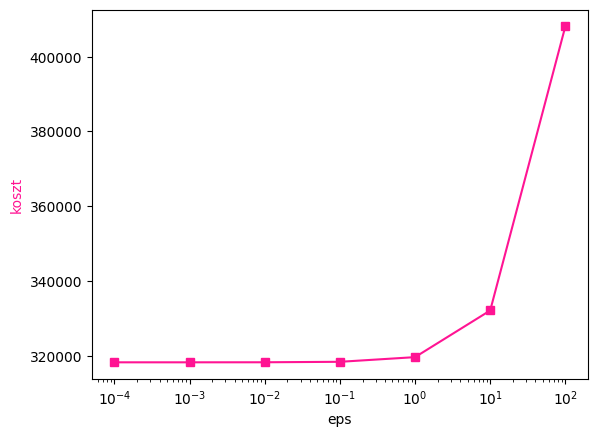

In [90]:
def eps_plot(eps, costs):
    fig, ax1 = plt.subplots()
    ax1.plot(eps, costs, "-s", color="deeppink")
    ax1.set_xscale("log")
    ax1.set_xlabel("eps")
    ax1.set_ylabel("koszt", color="deeppink")
    plt.show()
eps_plot(epss,costs)

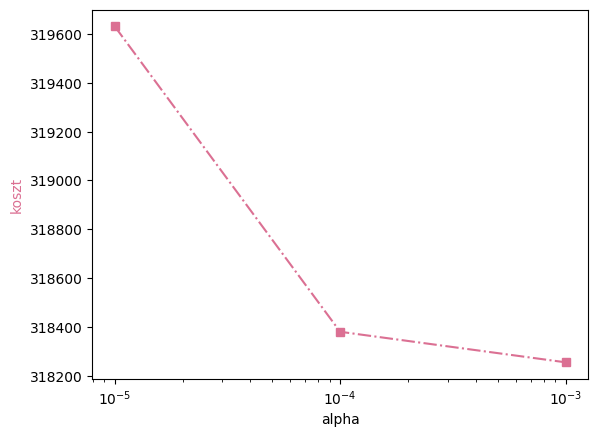

In [76]:
def alpha_plot(alpha, costs):
    fig, ax1 = plt.subplots()
    ax1.plot(alpha, costs, "-.s", color="palevioletred")
    ax1.set_xscale("log")
    ax1.set_xlabel("alpha")
    ax1.set_ylabel("koszt", color="palevioletred")
    plt.show()
alpha_plot(alphas, costs_a)

#### Koszt a kroki

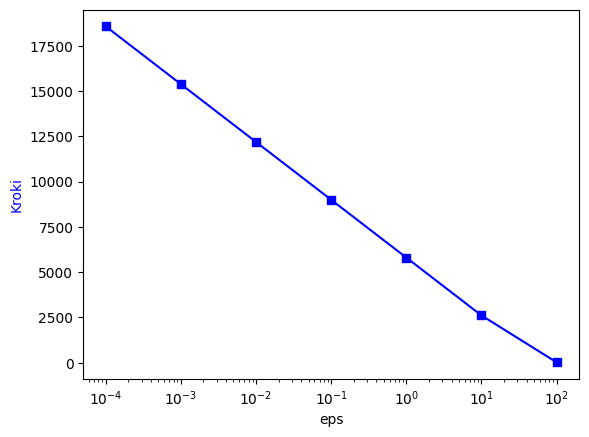

In [91]:
def eps_plot(eps, steps):
    fig, ax1 = plt.subplots()
    ax1.plot(eps, steps, "-s", color="blue")
    ax1.set_xscale("log")
    ax1.set_xlabel("eps")
    ax1.set_ylabel("Kroki", color="blue")
    plt.show()
eps_plot(epss,steps)

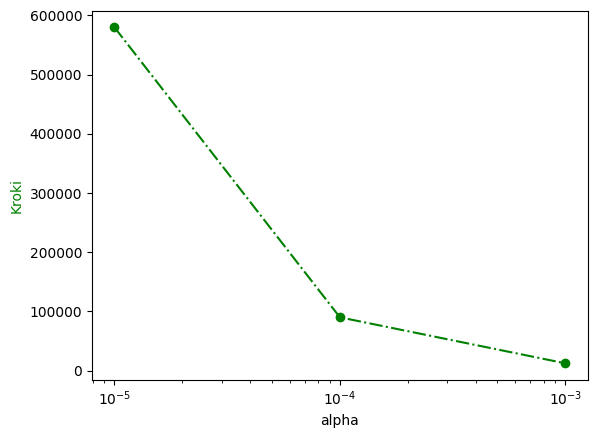

In [81]:
def alpha_plot(alpha, steps):
    fig, ax1 = plt.subplots()
    ax1.plot(alpha, steps, "-.o", color="green")
    ax1.set_xscale("log")
    ax1.set_xlabel("alpha")
    ax1.set_ylabel("Kroki", color="green")
    plt.show()
alpha_plot(alphas, steps_a)